<a href="https://colab.research.google.com/github/Shyamesh/SIT723-24/blob/main/TCP_switching_drl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

# List of filenames
csv_files = [
    '/content/drive/MyDrive/combine results/revised data/DRL Data/ client1 _bbr_full.csv',
    '/content/drive/MyDrive/combine results/revised data/DRL Data/client1_cubic_full.csv',
    '/content/drive/MyDrive/combine results/revised data/DRL Data/client1_pcc.csv',
    '/content/drive/MyDrive/combine results/revised data/DRL Data/client2_bbr_switch_cubic.csv',
    '/content/drive/MyDrive/combine results/revised data/DRL Data/client2_pcc.csv',
    '/content/drive/MyDrive/combine results/revised data/DRL Data/client2_pcc_switch_bbr.csv'
]

# Function to extract CCA from the filename
def get_cca_from_filename(filename, switch_time=40):
    if 'switch' in filename:
        if 'bbr_switch_cubic' in filename:
            return 'BBR', 'CUBIC', switch_time
        elif 'pcc_switch_bbr' in filename:
            return 'PCC', 'BBR', switch_time
    elif 'bbr' in filename:
        return 'BBR', None, None
    elif 'cubic' in filename:
        return 'CUBIC', None, None
    elif 'pcc' in filename:
        return 'PCC', None, None
    else:
        return 'UNKNOWN', None, None

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        if 'Timestamp' not in df.columns:
            print(f"Warning: 'Timestamp' column not found in {file}. Skipping this file.")
            continue
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure Timestamp is in datetime format
        df['time'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds()  # Create a 'time' column in seconds
        cca1, cca2, switch_time = get_cca_from_filename(file)
        if cca2 is None:
            df['CCA'] = cca1
        else:
            df['CCA'] = [cca1 if t <= switch_time else cca2 for t in df['time']]
        dataframes.append(df)
    else:
        print(f"File not found: {file}")

# Concatenate all DataFrames into a single DataFrame if dataframes list is not empty
if dataframes:
    combined_data = pd.concat(dataframes, ignore_index=True)
    # Save the combined DataFrame to a CSV file
    combined_data.to_csv('/content/drive/MyDrive/combine results/revised data/DRL Data/combined_data.csv', index=False)
    print("Combined data saved to '/content/drive/MyDrive/combine results/revised data/DRL Data/combined_data.csv'")
else:
    print("No valid files were found. Please check the file paths and content.")


Combined data saved to '/content/drive/MyDrive/combine results/revised data/DRL Data/combined_data.csv'


In [ ]:
# Fill missing values for numerical columns with mean
for col in combined_data.select_dtypes(include=['float64', 'int64']).columns:
    combined_data[col].fillna(combined_data[col].mean(), inplace=True)

# Fill missing values for categorical columns with mode
for col in combined_data.select_dtypes(include=['object']).columns:
    combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)

# Verify if all missing values are handled
missing_values_post = combined_data.isnull().sum()
print("Missing values after handling:")
print(missing_values_post)


Missing values after handling:
Timestamp      0
Throughput     0
LossRate       0
Latency        0
SendingRate    0
time           0
CCA            0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical columns
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Display the first few rows after standardization
print(combined_data.head())


            Timestamp  Throughput  LossRate   Latency  SendingRate      time  \
0 2024-05-30 05:59:18    1.380450  0.217757 -0.342772    -0.870552 -1.707103   
1 2024-05-30 05:59:19    1.951146 -0.048635 -0.348833    -0.752049 -1.675495   
2 2024-05-30 05:59:20    1.056903 -0.059987 -0.342628    -0.808464 -1.643888   
3 2024-05-30 05:59:21    0.327914 -0.063777 -0.301523    -0.286810 -1.612280   
4 2024-05-30 05:59:22   -0.549921 -0.065525 -0.312626    -0.385007 -1.580673   

   CCA  
0  BBR  
1  BBR  
2  BBR  
3  BBR  
4  BBR  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical columns
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Display the first few rows after standardization
print(combined_data.head())


            Timestamp  Throughput  LossRate   Latency  SendingRate      time  \
0 2024-05-30 05:59:18    1.380450  0.217757 -0.342772    -0.870552 -1.707103   
1 2024-05-30 05:59:19    1.951146 -0.048635 -0.348833    -0.752049 -1.675495   
2 2024-05-30 05:59:20    1.056903 -0.059987 -0.342628    -0.808464 -1.643888   
3 2024-05-30 05:59:21    0.327914 -0.063777 -0.301523    -0.286810 -1.612280   
4 2024-05-30 05:59:22   -0.549921 -0.065525 -0.312626    -0.385007 -1.580673   

   CCA  
0  BBR  
1  BBR  
2  BBR  
3  BBR  
4  BBR  


In [ ]:
# Split the data into training and testing sets
split_index = int(0.8 * len(combined_data))
train_data = combined_data.iloc[:split_index]
test_data = combined_data.iloc[split_index:]

# Save training data to CSV
train_data.to_csv('/content/drive/MyDrive/combine results/revised data/DRL Data/train_data.csv', index=False)

# Save testing data to CSV
test_data.to_csv('/content/drive/MyDrive/combine results/revised data/DRL Data/test_data.csv', index=False)

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

class CongestionControlEnv(gym.Env):
    def __init__(self, data, thresholds):
        super(CongestionControlEnv, self).__init__()
        self.data = data
        self.thresholds = thresholds
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(2)
        self.current_step = 0
        self.state = None
        self.current_cca = 'default'
        self.available_ccas = ['cca1', 'cca2', 'cca3']



    def reset(self):
        self.current_step = 0
        self.state = self.data.iloc[self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values
        self.current_cca = 'default'
        return self.state

    def step(self, action):
        if action == 1:
            best_cca = self.evaluate_best_cca()
            if best_cca != self.current_cca:
                self.current_cca = best_cca
                print(f"Switched to congestion control algorithm: {self.current_cca}")

        self.current_step += 1
        done = self.current_step >= len(self.data)
        if not done:
            self.state = self.data.iloc[self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values
        else:
            self.state = None

        reward = self._calculate_reward(action)
        info = {'action': action, 'cca': self.current_cca}

        return self.state, reward, done, info

    def evaluate_best_cca(self):
        current_state = self.state
        historical_data = self.get_historical_data()

        if historical_data is not None and len(historical_data) > 0:
            combined_state = 0.8 * current_state + 0.2 * np.mean(historical_data, axis=0)
        else:
            combined_state = current_state

        best_cca = self.choose_best_cca_from_evaluation(combined_state)
        return best_cca

    def choose_best_cca_from_evaluation(self, combined_state):
        weights = {'Throughput': 0.7, 'Latency': 0.2, 'LossRate': 0.1}
        cca_scores = {cca: sum(weights[metric] * combined_state[i] for i, metric in enumerate(weights)) for cca in self.available_ccas}
        best_cca = max(cca_scores, key=cca_scores.get)
        return best_cca


    def _calculate_reward(self, action):
        if self.state is None:  # Handle case where state is None
            return 0  # Return zero reward if state is None
        disparities = np.abs(self.state - self.data.iloc[self.current_step-1][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values)
        reward = 0
        if np.any(disparities > self.thresholds):
            reward += np.log10(0.059)  # High disparities reward
        else:
            reward -= np.log10(0.01)  # Low disparities penalty
        if action == 1:
            reward += np.log10(0.05) # Switching penalty
        return reward


    def get_historical_data(self):
        return self.data.iloc[:self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values

class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape
        self.action_space = action_space
        self.model = self.build_model()
        self.replay_buffer = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.loss_history = []
        self.accuracy_history = []
        self.save_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/my_dqn_model.h5'  # Specify your desired save path here

    def build_model(self):
        model = tf.keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=self.state_shape),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_space, activation='linear')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        state_tensor = tf.convert_to_tensor(state, dtype=tf.float32)
        act_values = self.model.predict(state_tensor)
        return np.argmax(act_values[0])

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

    def train(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        minibatch = random.sample(self.replay_buffer, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state_tensor = tf.convert_to_tensor(next_state, dtype=tf.float32)
                target = reward + self.gamma * np.amax(self.model.predict(next_state_tensor)[0])
            state_tensor = tf.convert_to_tensor(state, dtype=tf.float32)
            target_f = self.model.predict(state_tensor)
            target_f[0][action] = target
            history = self.model.fit(state_tensor, target_f, epochs=1, verbose=0)
            self.loss_history.append(history.history['loss'][0])
            self.accuracy_history.append(history.history['accuracy'][0])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save_model(self):
        self.model.save(self.save_path)

    def load_model(self, file_path):
        self.model = tf.keras.models.load_model(file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


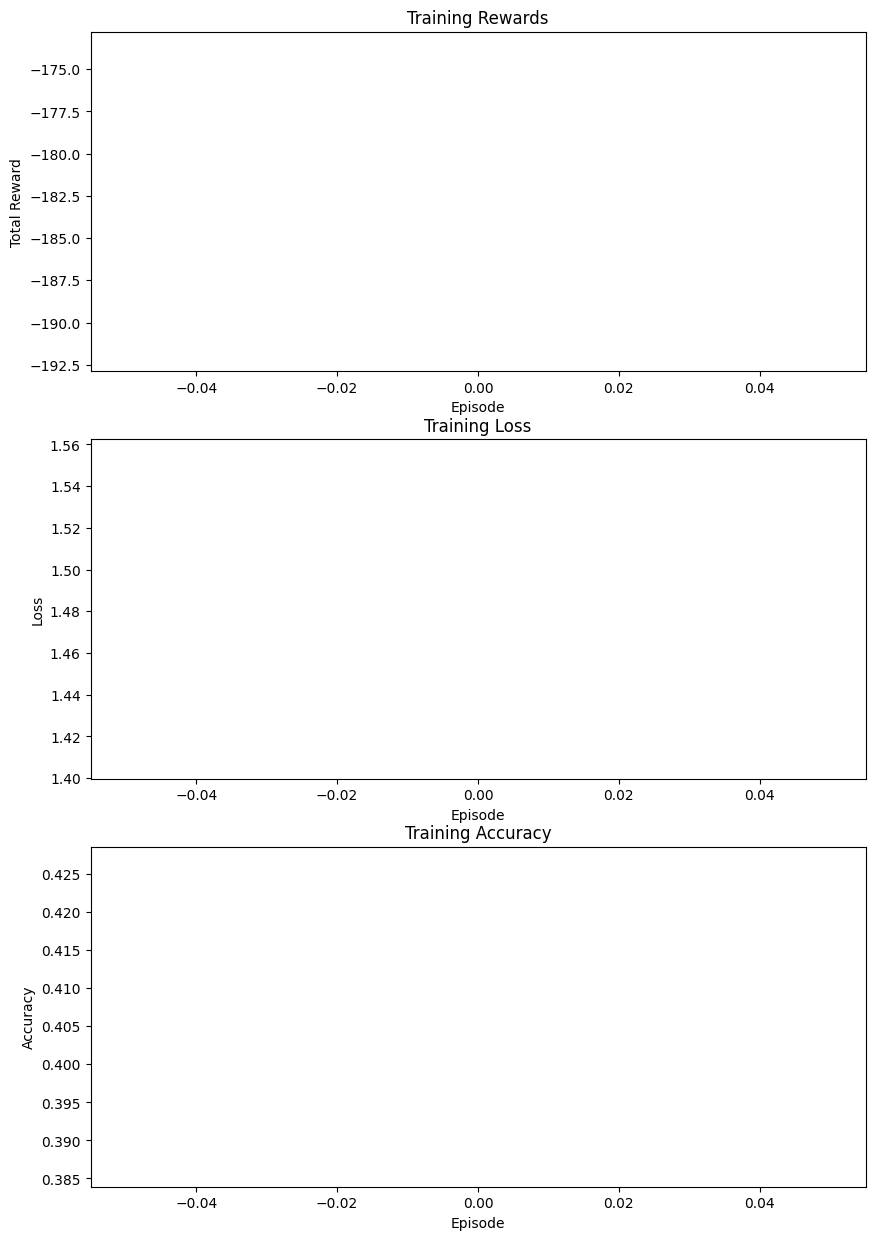

Episode: 1, Total Reward: -182.83406064363464, Loss: 1.4810003191232681, Accuracy: 0.40625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 2, Total Reward: -181.53303064797066, Loss: 1.284777465625666, Accuracy: 0.40625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 3, Total Reward: -194.54333060461047, Loss: 1.435847460059449, Accuracy: 0.625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 4, Total Reward: -194.54333060461045, Loss: 1.6557596719940193, Accuracy: 0.71875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 5, Total Reward: -172.42582067832282, Loss: 1.554291374515742, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 6, Total Reward: -197.14539059593844, Loss: 4.43047201492368, Accuracy: 0.8125
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 7, Total Reward: -178.9309706566427, Loss: 5.4941045040031895, Accuracy: 0.78125
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 8, Total Reward: -190.64024061761853, Loss: 7.11544906587369, Accuracy: 0.71875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 9, Total Reward: -176.32891066531474, Loss: 4.100923987716669, Accuracy: 0.6875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 10, Total Reward: -181.53303064797066, Loss: 6.356294277327834, Accuracy: 0.625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 11, Total Reward: -191.94127061328248, Loss: 9.255978967878036, Accuracy: 0.65625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 12, Total Reward: -189.33921062195455, Loss: 5.622377085848711, Accuracy: 0.40625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 13, Total Reward: -189.33921062195455, Loss: 5.48256018268512, Accuracy: 0.46875
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 14, Total Reward: -177.62994066097875, Loss: 3.4359222455718736, Accuracy: 0.90625
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 15, Total Reward: -188.03818062629054, Loss: 4.804615110275336, Accuracy: 0.75
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 16, Total Reward: -180.23200065230668, Loss: 3.8963685648432147, Accuracy: 0.75
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 51ms/step


<Figure size 640x480 with 0 Axes>

Episode: 17, Total Reward: -185.43612063496258, Loss: 3.7450618897360073, Accuracy: 0.65625
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 18, Total Reward: -177.62994066097872, Loss: 4.349438264267519, Accuracy: 0.625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 19, Total Reward: -180.23200065230668, Loss: 3.9114970050368356, Accuracy: 0.71875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 20, Total Reward: -181.53303064797066, Loss: 7.791243860498071, Accuracy: 0.65625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 21, Total Reward: -182.83406064363464, Loss: 9.600815979401432, Accuracy: 0.6875
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 22, Total Reward: -177.62994066097872, Loss: 8.900465025566518, Accuracy: 0.59375
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 23, Total Reward: -181.5330306479707, Loss: 4.2255042649303505, Accuracy: 0.5
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 24, Total Reward: -188.03818062629057, Loss: 4.304307625454385, Accuracy: 0.59375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 25, Total Reward: -172.42582067832282, Loss: 5.078499098599423, Accuracy: 0.75
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 26, Total Reward: -169.82376068699483, Loss: 4.368964552646503, Accuracy: 0.75
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 27, Total Reward: -175.02788066965078, Loss: 3.9770190515992, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 28, Total Reward: -173.72685067398677, Loss: 3.1013491539342795, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 29, Total Reward: -182.83406064363464, Loss: 1.1411041464307345, Accuracy: 0.65625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 30, Total Reward: -171.1247906826588, Loss: 1.8564688077603932, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 31, Total Reward: -172.42582067832282, Loss: 1.488777544018376, Accuracy: 0.8125
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 32, Total Reward: -175.02788066965076, Loss: 1.3194792536596651, Accuracy: 0.8125
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 33, Total Reward: -176.32891066531474, Loss: 1.5953501454350771, Accuracy: 0.8125
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 34, Total Reward: -171.1247906826588, Loss: 0.8490185177579406, Accuracy: 0.96875
1/1 [==============================] - 0s 20ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 35, Total Reward: -185.43612063496258, Loss: 1.2669138382498772, Accuracy: 0.90625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 36, Total Reward: -169.82376068699483, Loss: 1.1082738133263774, Accuracy: 0.9375
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 37, Total Reward: -168.52273069133085, Loss: 0.740685145809266, Accuracy: 0.875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 38, Total Reward: -173.7268506739868, Loss: 0.8012010270231258, Accuracy: 0.90625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 39, Total Reward: -176.32891066531474, Loss: 0.8641816421550175, Accuracy: 0.75
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 40, Total Reward: -188.03818062629057, Loss: 0.7454661243701253, Accuracy: 0.875
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 41, Total Reward: -178.9309706566427, Loss: 0.6603902263591976, Accuracy: 0.875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 42, Total Reward: -160.71655071734696, Loss: 0.8774677513598022, Accuracy: 0.8125
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 43, Total Reward: -173.72685067398677, Loss: 1.051333767087499, Accuracy: 0.625
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 44, Total Reward: -184.13509063929862, Loss: 1.159068118151481, Accuracy: 0.625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 45, Total Reward: -173.72685067398677, Loss: 0.9127242679032861, Accuracy: 0.90625
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 46, Total Reward: -171.12479068265884, Loss: 0.6333624419494299, Accuracy: 0.96875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 47, Total Reward: -163.31861070867495, Loss: 0.6496403904820909, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 48, Total Reward: -188.03818062629057, Loss: 0.7138741139242484, Accuracy: 0.78125
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 49, Total Reward: -178.93097065664267, Loss: 0.24783459431756683, Accuracy: 0.9375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 50, Total Reward: -165.9206707000029, Loss: 0.4337725283272107, Accuracy: 0.96875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 51, Total Reward: -172.42582067832282, Loss: 0.45646759399915027, Accuracy: 0.90625
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 52, Total Reward: -167.2217006956669, Loss: 0.4270149202857283, Accuracy: 0.9375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 53, Total Reward: -184.13509063929862, Loss: 0.2950467670780199, Accuracy: 0.96875
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 54, Total Reward: -168.52273069133085, Loss: 0.19734733525774573, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 55, Total Reward: -182.83406064363461, Loss: 0.19118154511670582, Accuracy: 0.90625
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 56, Total Reward: -169.82376068699486, Loss: 0.5118757776690472, Accuracy: 0.84375
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 57, Total Reward: -181.53303064797066, Loss: 0.6267237419415324, Accuracy: 0.84375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 58, Total Reward: -169.82376068699483, Loss: 0.2626476255754824, Accuracy: 0.9375
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 59, Total Reward: -158.114490726019, Loss: 0.08300057320957421, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 60, Total Reward: -167.2217006956669, Loss: 0.04439615479100212, Accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 61, Total Reward: -175.02788066965076, Loss: 0.04471860425110208, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 62, Total Reward: -171.1247906826588, Loss: 0.05981066106284061, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 63, Total Reward: -165.92067070000292, Loss: 0.03387779340164343, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 64, Total Reward: -159.415520721683, Loss: 0.0315126394662002, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 65, Total Reward: -167.22170069566687, Loss: 0.011462169235528563, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 66, Total Reward: -164.61964070433893, Loss: 0.05803475794755286, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 67, Total Reward: -176.32891066531474, Loss: 0.08799604667620997, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 68, Total Reward: -173.72685067398677, Loss: 0.08884902745035106, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 69, Total Reward: -165.9206707000029, Loss: 0.026185812596054348, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 70, Total Reward: -176.32891066531477, Loss: 0.02476275174547027, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 71, Total Reward: -169.82376068699483, Loss: 0.030847858806339445, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 72, Total Reward: -156.81346073035502, Loss: 0.014926197650538597, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 73, Total Reward: -156.81346073035505, Loss: 0.017969846247126497, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 74, Total Reward: -165.9206707000029, Loss: 0.01497954077558461, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 75, Total Reward: -158.11449072601903, Loss: 0.02175170015891581, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 76, Total Reward: -173.72685067398677, Loss: 0.017423159937663968, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 77, Total Reward: -171.12479068265884, Loss: 0.015488279098462954, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 78, Total Reward: -159.415520721683, Loss: 0.018756164946637455, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 79, Total Reward: -171.1247906826588, Loss: 0.007981712347032044, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 80, Total Reward: -171.1247906826588, Loss: 0.020915081187922624, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 81, Total Reward: -168.52273069133088, Loss: 0.017424670098819206, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 82, Total Reward: -160.716550717347, Loss: 0.01558598049473403, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 83, Total Reward: -165.92067070000292, Loss: 0.008008238078332397, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 84, Total Reward: -164.61964070433893, Loss: 0.006591333084656981, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 85, Total Reward: -158.11449072601903, Loss: 0.007929034009521274, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 86, Total Reward: -169.82376068699483, Loss: 0.012267656803317095, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 87, Total Reward: -163.31861070867495, Loss: 0.011428570120244785, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 88, Total Reward: -158.114490726019, Loss: 0.013196781095984988, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 89, Total Reward: -169.82376068699483, Loss: 0.006520196223618768, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 90, Total Reward: -158.11449072601903, Loss: 0.019097346391902192, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 91, Total Reward: -164.6196407043389, Loss: 0.01014932780935851, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 92, Total Reward: -160.716550717347, Loss: 0.005526896357707756, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 93, Total Reward: -154.21140073902708, Loss: 0.004876761379932759, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 94, Total Reward: -160.716550717347, Loss: 0.007284702757090145, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 95, Total Reward: -159.415520721683, Loss: 0.005902418835148637, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 96, Total Reward: -164.61964070433893, Loss: 0.010288821267977255, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 97, Total Reward: -162.01758071301097, Loss: 0.007810216571726869, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 98, Total Reward: -165.92067070000292, Loss: 0.01171662395245221, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 99, Total Reward: -165.9206707000029, Loss: 0.00554075321417713, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 100, Total Reward: -173.72685067398677, Loss: 0.0077907733984829974, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 101, Total Reward: -167.2217006956669, Loss: 0.006072122199896057, Accuracy: 1.0
1/1 [==============================] - 0s 60ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 102, Total Reward: -164.61964070433893, Loss: 0.00820681187565242, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 103, Total Reward: -175.02788066965076, Loss: 0.005034018177695998, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 104, Total Reward: -154.21140073902708, Loss: 0.009566299776679443, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 105, Total Reward: -150.30831075203517, Loss: 0.004885242910688703, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 106, Total Reward: -159.41552072168298, Loss: 0.0074314452737667125, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 107, Total Reward: -167.2217006956669, Loss: 0.007473220670135561, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 108, Total Reward: -152.9103707433631, Loss: 0.007479233474498415, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 109, Total Reward: -152.9103707433631, Loss: 0.00803014340573327, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 110, Total Reward: -162.01758071301097, Loss: 0.0059308986736255065, Accuracy: 1.0
1/1 [==============================] - 0s 21ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 111, Total Reward: -156.81346073035508, Loss: 0.002522591058834678, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 112, Total Reward: -149.00728075637116, Loss: 0.003005486610391017, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 113, Total Reward: -151.60934074769912, Loss: 0.005701566488426124, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 114, Total Reward: -165.92067070000292, Loss: 0.004334752646684592, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 115, Total Reward: -155.5124307346911, Loss: 0.00533344112938039, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 116, Total Reward: -164.61964070433893, Loss: 0.004868986009626042, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 117, Total Reward: -155.51243073469107, Loss: 0.004714786255703984, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 118, Total Reward: -162.01758071301097, Loss: 0.002898437940189069, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 119, Total Reward: -158.11449072601903, Loss: 0.002856231761654726, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 120, Total Reward: -171.12479068265884, Loss: 0.0022034994747173187, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 121, Total Reward: -155.51243073469107, Loss: 0.004303081189959812, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 122, Total Reward: -147.70625076070718, Loss: 0.0030122947270569966, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 123, Total Reward: -155.51243073469107, Loss: 0.006186379662096897, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 124, Total Reward: -154.21140073902708, Loss: 0.0032932434638155428, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 125, Total Reward: -163.31861070867495, Loss: 0.002631380634340985, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 126, Total Reward: -158.11449072601903, Loss: 0.005014455557557085, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 127, Total Reward: -147.7062507607072, Loss: 0.005063698757396651, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 128, Total Reward: -156.81346073035505, Loss: 0.0016929347342511392, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 129, Total Reward: -163.31861070867495, Loss: 0.002500538180413514, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 130, Total Reward: -155.51243073469107, Loss: 0.0028481889374916136, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 131, Total Reward: -154.21140073902708, Loss: 0.004728894969332487, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 132, Total Reward: -154.21140073902708, Loss: 0.00203379696824868, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 133, Total Reward: -159.415520721683, Loss: 0.0024386807913288067, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 134, Total Reward: -168.52273069133088, Loss: 0.001869122701350534, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 135, Total Reward: -135.99698079973138, Loss: 0.0012947586900509123, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 136, Total Reward: -149.00728075637116, Loss: 0.006245618990078583, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 137, Total Reward: -151.60934074769915, Loss: 0.007166021890043339, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 138, Total Reward: -164.61964070433893, Loss: 0.01146482900145429, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 139, Total Reward: -154.21140073902708, Loss: 0.0061423096327075655, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 140, Total Reward: -152.9103707433631, Loss: 0.005394682086546254, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 141, Total Reward: -163.31861070867492, Loss: 0.0025607528585283035, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 142, Total Reward: -149.0072807563712, Loss: 0.002944203836705128, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 143, Total Reward: -159.415520721683, Loss: 0.006102094123434654, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 144, Total Reward: -154.21140073902708, Loss: 0.007388923111648182, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 145, Total Reward: -150.30831075203517, Loss: 0.004436127295605274, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 146, Total Reward: -159.415520721683, Loss: 0.007215008575826687, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 147, Total Reward: -154.21140073902708, Loss: 0.004319355344478026, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 148, Total Reward: -146.40522076504323, Loss: 0.0020946397319789867, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 149, Total Reward: -158.11449072601903, Loss: 0.0033278214888241564, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 150, Total Reward: -150.30831075203514, Loss: 0.002436678359686084, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 151, Total Reward: -159.415520721683, Loss: 0.00335251316130325, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 152, Total Reward: -151.60934074769915, Loss: 0.0024638342129605917, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 153, Total Reward: -146.40522076504323, Loss: 0.0017553507649381572, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 154, Total Reward: -151.60934074769912, Loss: 0.0021111149731041223, Accuracy: 1.0
1/1 [==============================] - 0s 46ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 155, Total Reward: -147.7062507607072, Loss: 0.005961180352755946, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 156, Total Reward: -145.10419076937922, Loss: 0.001701681072518113, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 157, Total Reward: -156.81346073035505, Loss: 0.0034101841920346487, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 158, Total Reward: -149.0072807563712, Loss: 0.0025653102781006965, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 159, Total Reward: -156.81346073035505, Loss: 0.01079282429259365, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 160, Total Reward: -150.30831075203514, Loss: 0.013270187521357002, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 161, Total Reward: -160.71655071734696, Loss: 0.01707374482953128, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 162, Total Reward: -156.81346073035505, Loss: 0.007463886993264168, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 163, Total Reward: -147.70625076070718, Loss: 0.007059615256309826, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 164, Total Reward: -143.80316077371526, Loss: 0.0017433156296533525, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 165, Total Reward: -152.9103707433631, Loss: 0.002407386672643952, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 166, Total Reward: -146.4052207650432, Loss: 0.0025612400250452083, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 167, Total Reward: -145.10419076937922, Loss: 0.0032461054747727758, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 168, Total Reward: -151.60934074769912, Loss: 0.0029963730141275846, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 169, Total Reward: -139.90007078672332, Loss: 0.00424267828043412, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 170, Total Reward: -146.4052207650432, Loss: 0.003271831547920101, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 171, Total Reward: -151.60934074769912, Loss: 0.004413464730419037, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 172, Total Reward: -146.4052207650432, Loss: 0.017189657449534934, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 173, Total Reward: -149.00728075637116, Loss: 0.08413034679210796, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 174, Total Reward: -147.70625076070718, Loss: 0.531231553450425, Accuracy: 0.8125
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 175, Total Reward: -151.60934074769912, Loss: 1.8454625630110968, Accuracy: 0.78125
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 176, Total Reward: -142.50213077805128, Loss: 0.16946245909070967, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 177, Total Reward: -151.60934074769912, Loss: 0.037514948253203784, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 178, Total Reward: -141.20110078238727, Loss: 0.03750220174470087, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 179, Total Reward: -146.40522076504323, Loss: 0.015510730027756381, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 64ms/step


<Figure size 640x480 with 0 Axes>

Episode: 180, Total Reward: -146.40522076504323, Loss: 0.009431386261496755, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 181, Total Reward: -143.80316077371526, Loss: 0.0071290017633600655, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 182, Total Reward: -145.10419076937924, Loss: 0.01213500440644566, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 183, Total Reward: -145.10419076937924, Loss: 0.008809813812888478, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 184, Total Reward: -139.90007078672332, Loss: 0.00502804357529385, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 185, Total Reward: -146.4052207650432, Loss: 0.0047126484439559135, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 186, Total Reward: -142.50213077805125, Loss: 0.004275486332971923, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 187, Total Reward: -152.91037074336313, Loss: 0.0030135441702441312, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 188, Total Reward: -146.4052207650432, Loss: 0.006728807630508982, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 189, Total Reward: -147.7062507607072, Loss: 0.009752978262440593, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 190, Total Reward: -146.40522076504323, Loss: 0.006214130946887053, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 191, Total Reward: -146.40522076504323, Loss: 0.004385593243625863, Accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 192, Total Reward: -146.40522076504323, Loss: 0.0037152046929804783, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 193, Total Reward: -145.10419076937922, Loss: 0.004374043890777557, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 194, Total Reward: -147.7062507607072, Loss: 0.0019402682179929798, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 195, Total Reward: -143.80316077371526, Loss: 0.004047030444496613, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 196, Total Reward: -142.50213077805128, Loss: 0.004160678148309671, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 197, Total Reward: -150.30831075203514, Loss: 0.00618917302523414, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 198, Total Reward: -142.50213077805125, Loss: 0.003367930472450098, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 199, Total Reward: -142.50213077805128, Loss: 0.0028651622940856214, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 200, Total Reward: -143.80316077371523, Loss: 0.00242389719574021, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 201, Total Reward: -139.9000707867233, Loss: 0.0025536679896731584, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 202, Total Reward: -145.10419076937924, Loss: 0.0018436565797514959, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 203, Total Reward: -147.7062507607072, Loss: 0.005537665577833195, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 204, Total Reward: -146.4052207650432, Loss: 0.006552516313547585, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 205, Total Reward: -142.50213077805128, Loss: 0.0017895862725367806, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 47ms/step


<Figure size 640x480 with 0 Axes>

Episode: 206, Total Reward: -143.80316077371526, Loss: 0.0017737225184077943, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 207, Total Reward: -139.90007078672332, Loss: 0.0029349897598081043, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 208, Total Reward: -150.30831075203514, Loss: 0.007349283643634408, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 209, Total Reward: -138.59904079105934, Loss: 0.007750022117363642, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 45ms/step


<Figure size 640x480 with 0 Axes>

Episode: 210, Total Reward: -151.60934074769915, Loss: 0.00507890992571447, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 211, Total Reward: -145.10419076937922, Loss: 0.00655424858933884, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 212, Total Reward: -146.4052207650432, Loss: 0.0025673842742435227, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 213, Total Reward: -149.0072807563712, Loss: 0.00417876228584646, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 55ms/step


<Figure size 640x480 with 0 Axes>

Episode: 214, Total Reward: -151.60934074769912, Loss: 0.002278956071279481, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 215, Total Reward: -143.80316077371526, Loss: 0.005585393747026046, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 216, Total Reward: -152.9103707433631, Loss: 0.004004614975656295, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 217, Total Reward: -138.59904079105934, Loss: 0.018341483257472646, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 218, Total Reward: -146.40522076504323, Loss: 0.031556821138110536, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 219, Total Reward: -143.80316077371526, Loss: 0.005512877776084224, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 220, Total Reward: -143.80316077371523, Loss: 0.00981710060318619, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 221, Total Reward: -146.4052207650432, Loss: 0.014801230074283467, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 222, Total Reward: -139.90007078672332, Loss: 0.010707694818393065, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 223, Total Reward: -149.00728075637116, Loss: 0.024372163622729204, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 224, Total Reward: -146.4052207650432, Loss: 0.028995075141494908, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 225, Total Reward: -138.59904079105934, Loss: 0.03917596954374858, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 226, Total Reward: -149.0072807563712, Loss: 0.006073952432188889, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 227, Total Reward: -150.30831075203514, Loss: 0.00771977408658131, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 228, Total Reward: -134.69595080406742, Loss: 0.004820946975769402, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 229, Total Reward: -142.50213077805128, Loss: 0.008389416548425288, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 230, Total Reward: -133.39492080840344, Loss: 0.018988501871774588, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 231, Total Reward: -146.4052207650432, Loss: 0.02657155851176185, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 232, Total Reward: -143.80316077371526, Loss: 0.0026965725324998857, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 233, Total Reward: -137.29801079539536, Loss: 0.003192261710751154, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 234, Total Reward: -145.10419076937924, Loss: 0.0023008555377259654, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 235, Total Reward: -143.80316077371526, Loss: 0.016519312734999403, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 236, Total Reward: -137.29801079539536, Loss: 0.010442010440158356, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 237, Total Reward: -135.9969807997314, Loss: 0.018113193886392764, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 238, Total Reward: -138.59904079105934, Loss: 0.014329718668705027, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 239, Total Reward: -149.0072807563712, Loss: 0.00851830517927965, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 240, Total Reward: -141.20110078238727, Loss: 0.011292282935301046, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 241, Total Reward: -133.3949208084034, Loss: 0.020298609695601044, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 242, Total Reward: -143.80316077371526, Loss: 0.10338779333778803, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 243, Total Reward: -141.2011007823873, Loss: 0.01858782322733532, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 244, Total Reward: -138.59904079105934, Loss: 0.005860948764620844, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 245, Total Reward: -139.90007078672332, Loss: 0.0053466804452568795, Accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 246, Total Reward: -137.29801079539536, Loss: 0.005361079393253476, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 247, Total Reward: -143.80316077371526, Loss: 0.02094726753506393, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 248, Total Reward: -139.90007078672332, Loss: 0.0067763101522473335, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 249, Total Reward: -138.59904079105934, Loss: 0.001981375169407329, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 250, Total Reward: -139.90007078672332, Loss: 0.002905632748991138, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 251, Total Reward: -135.99698079973138, Loss: 0.003923519980446599, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 252, Total Reward: -145.10419076937922, Loss: 0.0023137433178135325, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 253, Total Reward: -145.10419076937924, Loss: 0.005059524656871872, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 254, Total Reward: -138.59904079105934, Loss: 0.012494866737881694, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 255, Total Reward: -143.80316077371523, Loss: 0.011640132865863961, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 256, Total Reward: -135.9969807997314, Loss: 0.021481463229577002, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 257, Total Reward: -135.99698079973138, Loss: 0.06596873740909359, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 258, Total Reward: -135.99698079973138, Loss: 0.013941131168451193, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 259, Total Reward: -141.2011007823873, Loss: 0.007043455496386741, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 260, Total Reward: -129.49183082141147, Loss: 0.005865477207862568, Accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 261, Total Reward: -138.5990407910593, Loss: 0.004212073010307904, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 262, Total Reward: -139.90007078672332, Loss: 0.002406836314833072, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 51ms/step


<Figure size 640x480 with 0 Axes>

Episode: 263, Total Reward: -145.10419076937922, Loss: 0.0020057246986766586, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 264, Total Reward: -139.90007078672332, Loss: 0.0009147488071334919, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 265, Total Reward: -138.59904079105934, Loss: 0.0005396674486064512, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 266, Total Reward: -141.20110078238733, Loss: 0.0022889662444640635, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 267, Total Reward: -142.50213077805128, Loss: 0.0039276925855347145, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 268, Total Reward: -139.90007078672332, Loss: 0.010527792273023806, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 269, Total Reward: -137.29801079539536, Loss: 0.00414176647768727, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 270, Total Reward: -138.59904079105937, Loss: 0.01839281614797983, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 271, Total Reward: -141.2011007823873, Loss: 0.004370426030163799, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 272, Total Reward: -142.50213077805128, Loss: 0.0025789253226093933, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 273, Total Reward: -130.79286081707545, Loss: 0.0016755958181988717, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 274, Total Reward: -138.59904079105934, Loss: 0.00879004495470781, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 275, Total Reward: -139.90007078672332, Loss: 0.13700990225606802, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 276, Total Reward: -138.59904079105934, Loss: 0.1971372546274779, Accuracy: 0.75
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 277, Total Reward: -141.20110078238727, Loss: 0.07548302595387213, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 278, Total Reward: -137.29801079539536, Loss: 0.04664446855804272, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 279, Total Reward: -133.39492080840344, Loss: 0.06270261120033638, Accuracy: 0.96875
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 280, Total Reward: -145.10419076937924, Loss: 0.1439131745028135, Accuracy: 0.96875
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 281, Total Reward: -134.6959508040674, Loss: 0.016014497997502986, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 282, Total Reward: -139.90007078672332, Loss: 0.02430863906857894, Accuracy: 1.0
1/1 [==============================] - 0s 48ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 52ms/step


<Figure size 640x480 with 0 Axes>

Episode: 283, Total Reward: -134.69595080406742, Loss: 0.07273309396737204, Accuracy: 1.0
1/1 [==============================] - 0s 52ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 284, Total Reward: -139.90007078672332, Loss: 0.04480525038957239, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 285, Total Reward: -142.50213077805125, Loss: 0.12453648212846247, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 286, Total Reward: -150.30831075203517, Loss: 0.12886220038853935, Accuracy: 0.96875
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 287, Total Reward: -134.6959508040674, Loss: 0.11153747704111083, Accuracy: 1.0
1/1 [==============================] - 0s 23ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 47ms/step


<Figure size 640x480 with 0 Axes>

Episode: 288, Total Reward: -135.99698079973138, Loss: 0.05458753168613839, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 289, Total Reward: -132.09389081273946, Loss: 0.026312420977092188, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 290, Total Reward: -126.8897708300835, Loss: 0.03669119424290557, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 291, Total Reward: -135.99698079973138, Loss: 0.033435616041970206, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 292, Total Reward: -137.29801079539536, Loss: 0.005113041381775929, Accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 293, Total Reward: -134.6959508040674, Loss: 0.004368054959115852, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 294, Total Reward: -141.2011007823873, Loss: 0.0025038709016484972, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 295, Total Reward: -130.79286081707545, Loss: 0.0019473293210694465, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 296, Total Reward: -143.80316077371526, Loss: 0.0062339720316799685, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 297, Total Reward: -134.6959508040674, Loss: 0.009490212326284109, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 298, Total Reward: -132.09389081273943, Loss: 0.017048517561534027, Accuracy: 1.0
1/1 [==============================] - 0s 53ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 299, Total Reward: -138.59904079105934, Loss: 0.012124307883141228, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

Episode: 300, Total Reward: -132.09389081273946, Loss: 0.0036427783230124078, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 50ms/step


<Figure size 640x480 with 0 Axes>

Episode: 301, Total Reward: -133.39492080840344, Loss: 0.005479215444040619, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 302, Total Reward: -138.59904079105934, Loss: 0.008506280959181822, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 303, Total Reward: -135.99698079973138, Loss: 0.022393325235270822, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 304, Total Reward: -141.2011007823873, Loss: 0.009905352181476701, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 305, Total Reward: -135.99698079973138, Loss: 0.010675198549961351, Accuracy: 1.0
1/1 [==============================] - 0s 50ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 306, Total Reward: -138.59904079105934, Loss: 0.010635265045038977, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 26ms/step


<Figure size 640x480 with 0 Axes>

Episode: 307, Total Reward: -134.6959508040674, Loss: 0.002982455437063436, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 308, Total Reward: -138.59904079105934, Loss: 0.0016799833886693705, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 309, Total Reward: -138.59904079105934, Loss: 0.0015930681532836388, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 310, Total Reward: -133.3949208084034, Loss: 0.002728183577630716, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 311, Total Reward: -130.79286081707548, Loss: 0.0066630334868023056, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 312, Total Reward: -141.2011007823873, Loss: 0.006563129756159469, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 313, Total Reward: -142.50213077805128, Loss: 0.0054249193287887465, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 54ms/step


<Figure size 640x480 with 0 Axes>

Episode: 314, Total Reward: -134.6959508040674, Loss: 0.005180700930907278, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

Episode: 315, Total Reward: -130.79286081707545, Loss: 0.00794643026142694, Accuracy: 1.0
1/1 [==============================] - 0s 50ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 65ms/step


<Figure size 640x480 with 0 Axes>

Episode: 316, Total Reward: -137.29801079539536, Loss: 0.006133860488091614, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 317, Total Reward: -132.09389081273943, Loss: 0.007455121186922042, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 318, Total Reward: -143.80316077371523, Loss: 0.002908661162223325, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 319, Total Reward: -133.3949208084034, Loss: 0.0024180287546755608, Accuracy: 1.0
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

Episode: 320, Total Reward: -134.6959508040674, Loss: 0.006112484323182343, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 83ms/step


<Figure size 640x480 with 0 Axes>

Episode: 321, Total Reward: -128.19080082574752, Loss: 0.004215417932300625, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 322, Total Reward: -130.79286081707545, Loss: 0.0029339460558617247, Accuracy: 1.0
1/1 [==============================] - 0s 21ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 323, Total Reward: -130.79286081707545, Loss: 0.0021005351330245503, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 324, Total Reward: -133.39492080840344, Loss: 0.0034988719453963313, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 325, Total Reward: -134.6959508040674, Loss: 0.0024108033020411312, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 326, Total Reward: -137.29801079539536, Loss: 0.0017485972095983016, Accuracy: 1.0
1/1 [==============================] - 0s 50ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 327, Total Reward: -132.09389081273946, Loss: 0.003879992930365006, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 328, Total Reward: -138.59904079105934, Loss: 0.007743948841039128, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 329, Total Reward: -126.88977083008353, Loss: 0.01221393833611728, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 330, Total Reward: -130.79286081707545, Loss: 0.0030731648960227176, Accuracy: 1.0
1/1 [==============================] - 0s 51ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 331, Total Reward: -138.59904079105934, Loss: 0.006878721854320702, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 332, Total Reward: -137.29801079539536, Loss: 0.006039701081533622, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 333, Total Reward: -133.3949208084034, Loss: 0.005232208826896567, Accuracy: 1.0
1/1 [==============================] - 0s 26ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 334, Total Reward: -125.58874083441954, Loss: 0.02250680557818896, Accuracy: 1.0
1/1 [==============================] - 0s 24ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 335, Total Reward: -134.6959508040674, Loss: 0.022058536404983897, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 336, Total Reward: -130.79286081707545, Loss: 0.021673936222214252, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 337, Total Reward: -135.99698079973138, Loss: 0.053311616583926025, Accuracy: 1.0
1/1 [==============================] - 0s 48ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 338, Total Reward: -146.4052207650432, Loss: 0.14466699819422502, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 339, Total Reward: -133.3949208084034, Loss: 0.04568720411725735, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 340, Total Reward: -138.59904079105934, Loss: 0.02925824837723212, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 341, Total Reward: -134.6959508040674, Loss: 0.2059896761184632, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 342, Total Reward: -132.09389081273946, Loss: 0.035659420903357386, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 343, Total Reward: -134.6959508040674, Loss: 0.026593486382807896, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 344, Total Reward: -145.10419076937922, Loss: 0.015479079141698548, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 345, Total Reward: -133.3949208084034, Loss: 0.024703811425297317, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 346, Total Reward: -133.3949208084034, Loss: 0.021402024567350963, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 347, Total Reward: -134.69595080406742, Loss: 0.06801276340002005, Accuracy: 1.0
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 348, Total Reward: -135.99698079973138, Loss: 0.06123352732333842, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

Episode: 349, Total Reward: -138.59904079105934, Loss: 0.04893873518449254, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 350, Total Reward: -135.99698079973138, Loss: 0.04823200351034984, Accuracy: 0.96875
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 351, Total Reward: -132.09389081273943, Loss: 0.24213504996851043, Accuracy: 0.9375
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 352, Total Reward: -130.79286081707545, Loss: 0.1671670695541252, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 353, Total Reward: -137.29801079539536, Loss: 0.01233149288310642, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 354, Total Reward: -137.29801079539536, Loss: 0.025650774383620956, Accuracy: 1.0
1/1 [==============================] - 0s 68ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

Episode: 355, Total Reward: -134.6959508040674, Loss: 0.03972179392627595, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 356, Total Reward: -130.79286081707548, Loss: 0.01052102761622109, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 357, Total Reward: -130.79286081707548, Loss: 0.0051261226385577174, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 57ms/step


<Figure size 640x480 with 0 Axes>

Episode: 358, Total Reward: -138.59904079105934, Loss: 0.009287546527559698, Accuracy: 1.0
1/1 [==============================] - 0s 49ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 359, Total Reward: -130.79286081707545, Loss: 0.004861583248157331, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 77ms/step


<Figure size 640x480 with 0 Axes>

Episode: 360, Total Reward: -134.6959508040674, Loss: 0.0037301985735780363, Accuracy: 1.0
1/1 [==============================] - 0s 46ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 361, Total Reward: -129.49183082141147, Loss: 0.004386723607694876, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 98ms/step


<Figure size 640x480 with 0 Axes>

Episode: 362, Total Reward: -129.49183082141147, Loss: 0.006675120239833632, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 363, Total Reward: -135.99698079973138, Loss: 0.013478719687327612, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 51ms/step


<Figure size 640x480 with 0 Axes>

Episode: 364, Total Reward: -130.79286081707548, Loss: 0.01701724607102051, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 365, Total Reward: -132.09389081273943, Loss: 0.014388922586078934, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 366, Total Reward: -132.09389081273943, Loss: 0.006423681814339943, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 367, Total Reward: -134.6959508040674, Loss: 0.009047116685337642, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 368, Total Reward: -134.69595080406742, Loss: 0.012691186569099955, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 369, Total Reward: -130.79286081707548, Loss: 0.0034990312133231782, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 370, Total Reward: -134.6959508040674, Loss: 0.0019955421785766703, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 371, Total Reward: -129.49183082141147, Loss: 0.0007988376547132248, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 372, Total Reward: -125.58874083441955, Loss: 0.0038881251687712393, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 373, Total Reward: -134.6959508040674, Loss: 0.00496231474267006, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 374, Total Reward: -130.79286081707545, Loss: 0.011325086152282893, Accuracy: 1.0
1/1 [==============================] - 0s 46ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 375, Total Reward: -130.79286081707545, Loss: 0.017009651135367676, Accuracy: 1.0
1/1 [==============================] - 0s 48ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 376, Total Reward: -129.4918308214115, Loss: 0.006905904969130461, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 377, Total Reward: -132.09389081273943, Loss: 0.011044939664316189, Accuracy: 1.0
1/1 [==============================] - 0s 64ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 378, Total Reward: -134.6959508040674, Loss: 0.006464530780704081, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 379, Total Reward: -132.09389081273943, Loss: 0.0086995310549014, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 30ms/step


<Figure size 640x480 with 0 Axes>

Episode: 380, Total Reward: -130.79286081707548, Loss: 0.0030064641079547982, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 47ms/step


<Figure size 640x480 with 0 Axes>

Episode: 381, Total Reward: -134.6959508040674, Loss: 0.016228332191133177, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 382, Total Reward: -132.09389081273943, Loss: 0.004803616266372046, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 57ms/step


<Figure size 640x480 with 0 Axes>

Episode: 383, Total Reward: -132.09389081273946, Loss: 0.004357468105979478, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 384, Total Reward: -132.09389081273943, Loss: 0.004504138881941344, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 385, Total Reward: -133.3949208084034, Loss: 0.0007455579545307955, Accuracy: 1.0
1/1 [==============================] - 0s 81ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 386, Total Reward: -128.1908008257475, Loss: 0.002140902030362213, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 73ms/step


<Figure size 640x480 with 0 Axes>

Episode: 387, Total Reward: -129.49183082141147, Loss: 0.001027800898782516, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 388, Total Reward: -130.79286081707545, Loss: 0.001107501033970948, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

Episode: 389, Total Reward: -129.49183082141147, Loss: 0.001978765180524533, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 390, Total Reward: -126.88977083008352, Loss: 0.001624601400692427, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 52ms/step


<Figure size 640x480 with 0 Axes>

Episode: 391, Total Reward: -125.58874083441955, Loss: 0.0011992227261998778, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 51ms/step


<Figure size 640x480 with 0 Axes>

Episode: 392, Total Reward: -124.28771083875557, Loss: 0.00586796383777255, Accuracy: 1.0
1/1 [==============================] - 0s 50ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 45ms/step


<Figure size 640x480 with 0 Axes>

Episode: 393, Total Reward: -129.4918308214115, Loss: 0.0037185242316581935, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 394, Total Reward: -133.3949208084034, Loss: 0.002553073188039434, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 395, Total Reward: -130.79286081707548, Loss: 0.0017991468904483554, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 47ms/step


<Figure size 640x480 with 0 Axes>

Episode: 396, Total Reward: -126.88977083008352, Loss: 0.0006897280616158241, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 397, Total Reward: -134.6959508040674, Loss: 0.001080699732483481, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

Episode: 398, Total Reward: -128.1908008257475, Loss: 0.0009170468811134924, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 399, Total Reward: -133.3949208084034, Loss: 0.0019029727197903412, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 62ms/step


<Figure size 640x480 with 0 Axes>

Episode: 400, Total Reward: -132.09389081273943, Loss: 0.0033014850890822345, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 401, Total Reward: -125.58874083441955, Loss: 0.0013673857737899198, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 402, Total Reward: -130.79286081707548, Loss: 0.0007849063098319675, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 403, Total Reward: -135.99698079973138, Loss: 0.0014957459885636126, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 404, Total Reward: -133.3949208084034, Loss: 0.003716281845584035, Accuracy: 1.0
1/1 [==============================] - 0s 60ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 405, Total Reward: -133.39492080840344, Loss: 0.007596351125698675, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 65ms/step


<Figure size 640x480 with 0 Axes>

Episode: 406, Total Reward: -132.09389081273943, Loss: 0.012864155863098858, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 407, Total Reward: -134.6959508040674, Loss: 0.005387109015259739, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 408, Total Reward: -132.09389081273943, Loss: 0.007850674801488822, Accuracy: 1.0
1/1 [==============================] - 0s 67ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 409, Total Reward: -129.49183082141147, Loss: 0.004969024653178167, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 410, Total Reward: -129.49183082141147, Loss: 0.0010635861221430787, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 411, Total Reward: -130.79286081707548, Loss: 0.016471217662456183, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 412, Total Reward: -126.88977083008352, Loss: 0.01284661713452806, Accuracy: 1.0
1/1 [==============================] - 0s 48ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 413, Total Reward: -132.09389081273943, Loss: 0.01049003141696403, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 414, Total Reward: -122.98668084309159, Loss: 0.06432730454127977, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 55ms/step


<Figure size 640x480 with 0 Axes>

Episode: 415, Total Reward: -133.39492080840344, Loss: 0.0435547891056558, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 416, Total Reward: -130.79286081707548, Loss: 0.11045926406950457, Accuracy: 0.96875
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 417, Total Reward: -130.79286081707548, Loss: 0.05729059397162928, Accuracy: 0.8125
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 418, Total Reward: -126.88977083008352, Loss: 0.046881380865443134, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 419, Total Reward: -132.09389081273943, Loss: 0.0063841836895903725, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 420, Total Reward: -126.8897708300835, Loss: 0.00910668788952762, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 421, Total Reward: -126.8897708300835, Loss: 0.024196505357338083, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 63ms/step


<Figure size 640x480 with 0 Axes>

Episode: 422, Total Reward: -133.3949208084034, Loss: 0.009666130120876915, Accuracy: 1.0
1/1 [==============================] - 0s 66ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 423, Total Reward: -129.49183082141147, Loss: 0.002617924229127766, Accuracy: 1.0
1/1 [==============================] - 0s 52ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 63ms/step


<Figure size 640x480 with 0 Axes>

Episode: 424, Total Reward: -128.19080082574752, Loss: 0.001589987715362895, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 425, Total Reward: -129.4918308214115, Loss: 0.009696331127145186, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 426, Total Reward: -134.6959508040674, Loss: 0.003141250575367849, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 57ms/step


<Figure size 640x480 with 0 Axes>

Episode: 427, Total Reward: -132.09389081273943, Loss: 0.004162442584004111, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 428, Total Reward: -130.79286081707545, Loss: 0.03343181581027466, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 429, Total Reward: -132.09389081273943, Loss: 0.04111835705248268, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 430, Total Reward: -124.28771083875554, Loss: 0.019320796364866055, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

Episode: 431, Total Reward: -125.58874083441954, Loss: 0.0069778762378973624, Accuracy: 1.0
1/1 [==============================] - 0s 61ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 432, Total Reward: -128.19080082574752, Loss: 0.0022063734355697306, Accuracy: 1.0
1/1 [==============================] - 0s 35ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 45ms/step


<Figure size 640x480 with 0 Axes>

Episode: 433, Total Reward: -126.88977083008352, Loss: 0.004178456283398191, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 434, Total Reward: -133.3949208084034, Loss: 0.0039288264212018476, Accuracy: 1.0
1/1 [==============================] - 0s 46ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 435, Total Reward: -130.79286081707548, Loss: 0.005387119241106575, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 436, Total Reward: -125.58874083441954, Loss: 0.003405288273199858, Accuracy: 1.0
1/1 [==============================] - 0s 73ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 437, Total Reward: -134.6959508040674, Loss: 0.0036920342878374868, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 66ms/step


<Figure size 640x480 with 0 Axes>

Episode: 438, Total Reward: -126.88977083008353, Loss: 0.005723063772734349, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

Episode: 439, Total Reward: -129.4918308214115, Loss: 0.018819622485011678, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 58ms/step


<Figure size 640x480 with 0 Axes>

Episode: 440, Total Reward: -126.88977083008352, Loss: 0.03550964406991852, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 441, Total Reward: -126.88977083008352, Loss: 0.3464490348687832, Accuracy: 0.96875
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 442, Total Reward: -130.79286081707545, Loss: 0.07712526294159261, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 58ms/step


<Figure size 640x480 with 0 Axes>

Episode: 443, Total Reward: -129.4918308214115, Loss: 0.06519337318263752, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 444, Total Reward: -129.4918308214115, Loss: 0.026213449413944545, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 445, Total Reward: -133.3949208084034, Loss: 0.04368693257038103, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 446, Total Reward: -133.39492080840344, Loss: 0.009263279988317663, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 447, Total Reward: -133.3949208084034, Loss: 0.004671998940125377, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 448, Total Reward: -126.88977083008352, Loss: 0.008199206862627761, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 449, Total Reward: -129.4918308214115, Loss: 0.0073776695483616095, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 55ms/step


<Figure size 640x480 with 0 Axes>

Episode: 450, Total Reward: -130.79286081707545, Loss: 0.007841310644209898, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 451, Total Reward: -126.88977083008352, Loss: 0.005265942545293001, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 452, Total Reward: -124.28771083875557, Loss: 0.006202501361769919, Accuracy: 1.0
1/1 [==============================] - 0s 30ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 453, Total Reward: -128.1908008257475, Loss: 0.003257537422655332, Accuracy: 1.0
1/1 [==============================] - 0s 74ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 454, Total Reward: -130.79286081707548, Loss: 0.0009527355121576875, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 73ms/step


<Figure size 640x480 with 0 Axes>

Episode: 455, Total Reward: -128.19080082574752, Loss: 0.0025102029318873065, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 456, Total Reward: -126.88977083008353, Loss: 0.0008756673346397292, Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 457, Total Reward: -129.4918308214115, Loss: 0.0010022914664205018, Accuracy: 1.0
1/1 [==============================] - 0s 72ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 458, Total Reward: -124.28771083875557, Loss: 0.0012358336304032491, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 62ms/step


<Figure size 640x480 with 0 Axes>

Episode: 459, Total Reward: -132.09389081273943, Loss: 0.0032491787417825435, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 460, Total Reward: -129.4918308214115, Loss: 0.0032998132369357336, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 461, Total Reward: -129.4918308214115, Loss: 0.0034091554705923954, Accuracy: 1.0
1/1 [==============================] - 0s 52ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

Episode: 462, Total Reward: -129.4918308214115, Loss: 0.001901643774203876, Accuracy: 1.0
1/1 [==============================] - 0s 55ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 463, Total Reward: -126.88977083008352, Loss: 0.002295264488225257, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 66ms/step


<Figure size 640x480 with 0 Axes>

Episode: 464, Total Reward: -128.1908008257475, Loss: 0.003810223341474739, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 465, Total Reward: -128.1908008257475, Loss: 0.003996058171026107, Accuracy: 1.0
1/1 [==============================] - 0s 57ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 466, Total Reward: -122.98668084309159, Loss: 0.0011151010547791884, Accuracy: 1.0
1/1 [==============================] - 0s 36ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 467, Total Reward: -129.4918308214115, Loss: 0.001564705371265518, Accuracy: 1.0
1/1 [==============================] - 0s 46ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 468, Total Reward: -135.99698079973135, Loss: 0.0007575589818316075, Accuracy: 1.0
1/1 [==============================] - 0s 31ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 469, Total Reward: -128.19080082574752, Loss: 0.0017654411578860163, Accuracy: 1.0
1/1 [==============================] - 0s 54ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 470, Total Reward: -128.1908008257475, Loss: 0.0004952518496565972, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 54ms/step


<Figure size 640x480 with 0 Axes>

Episode: 471, Total Reward: -129.4918308214115, Loss: 0.0016505641759749778, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 36ms/step


<Figure size 640x480 with 0 Axes>

Episode: 472, Total Reward: -128.19080082574752, Loss: 0.0017819015131976812, Accuracy: 1.0
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

Episode: 473, Total Reward: -125.58874083441954, Loss: 0.0023944728931155623, Accuracy: 1.0
1/1 [==============================] - 0s 34ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 474, Total Reward: -126.8897708300835, Loss: 0.0070025230089072465, Accuracy: 1.0
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

Episode: 475, Total Reward: -128.1908008257475, Loss: 0.002508045028264405, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 51ms/step


<Figure size 640x480 with 0 Axes>

Episode: 476, Total Reward: -129.49183082141147, Loss: 0.006463738647255468, Accuracy: 1.0
1/1 [==============================] - 0s 43ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 55ms/step


<Figure size 640x480 with 0 Axes>

Episode: 477, Total Reward: -126.8897708300835, Loss: 0.0025159866364106165, Accuracy: 1.0
1/1 [==============================] - 0s 77ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

Episode: 478, Total Reward: -130.79286081707548, Loss: 0.002734672506960578, Accuracy: 1.0
1/1 [==============================] - 0s 49ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step


<Figure size 640x480 with 0 Axes>

Episode: 479, Total Reward: -128.19080082574752, Loss: 0.0007885721536808887, Accuracy: 1.0
1/1 [==============================] - 0s 60ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step


<Figure size 640x480 with 0 Axes>

Episode: 480, Total Reward: -125.58874083441954, Loss: 0.002921001998288375, Accuracy: 1.0
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

Episode: 481, Total Reward: -124.28771083875557, Loss: 0.0026339502422274563, Accuracy: 1.0
1/1 [==============================] - 0s 48ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 50ms/step


<Figure size 640x480 with 0 Axes>

Episode: 482, Total Reward: -132.09389081273943, Loss: 0.006469195792647042, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 49ms/step


<Figure size 640x480 with 0 Axes>

Episode: 483, Total Reward: -124.28771083875556, Loss: 0.002093296139605627, Accuracy: 1.0
1/1 [==============================] - 0s 60ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

Episode: 484, Total Reward: -126.8897708300835, Loss: 0.008900203138637153, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 56ms/step


<Figure size 640x480 with 0 Axes>

Episode: 485, Total Reward: -128.1908008257475, Loss: 0.013305614874013827, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 486, Total Reward: -135.99698079973138, Loss: 0.034829476907418666, Accuracy: 1.0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 58ms/step


<Figure size 640x480 with 0 Axes>

Episode: 487, Total Reward: -125.58874083441954, Loss: 0.2117694865410158, Accuracy: 1.0
1/1 [==============================] - 0s 32ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 488, Total Reward: -129.4918308214115, Loss: 0.09885791794113175, Accuracy: 0.96875
1/1 [==============================] - 0s 50ms/step


<Figure size 640x480 with 0 Axes>

Episode: 489, Total Reward: -121.68565084742761, Loss: 0.2743738454923914, Accuracy: 1.0
1/1 [==============================] - 0s 44ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 52ms/step


<Figure size 640x480 with 0 Axes>

Episode: 490, Total Reward: -125.58874083441954, Loss: 0.19278690462397208, Accuracy: 0.9375
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 491, Total Reward: -124.28771083875556, Loss: 0.20235339841110545, Accuracy: 1.0
1/1 [==============================] - 0s 59ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

Episode: 492, Total Reward: -129.4918308214115, Loss: 0.0939320632860472, Accuracy: 0.96875
1/1 [==============================] - 0s 50ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step


<Figure size 640x480 with 0 Axes>

Episode: 493, Total Reward: -126.88977083008352, Loss: 0.023701690362258887, Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 31ms/step


<Figure size 640x480 with 0 Axes>

Episode: 494, Total Reward: -129.4918308214115, Loss: 0.05760309576021427, Accuracy: 1.0
1/1 [==============================] - 0s 38ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 65ms/step


<Figure size 640x480 with 0 Axes>

Episode: 495, Total Reward: -125.58874083441954, Loss: 0.0522931232535484, Accuracy: 1.0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 496, Total Reward: -126.88977083008352, Loss: 0.02789281724722059, Accuracy: 1.0
1/1 [==============================] - 0s 49ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 497, Total Reward: -129.49183082141147, Loss: 0.010421038564800256, Accuracy: 1.0
1/1 [==============================] - 0s 49ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

Episode: 498, Total Reward: -124.28771083875556, Loss: 0.018521034147909177, Accuracy: 1.0
1/1 [==============================] - 0s 42ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

Episode: 499, Total Reward: -125.58874083441953, Loss: 0.021506421468586723, Accuracy: 1.0
1/1 [==============================] - 0s 40ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 44ms/step


<Figure size 640x480 with 0 Axes>

Episode: 500, Total Reward: -125.58874083441953, Loss: 0.00670122773942694, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 47ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 33ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 37ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 25ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 27ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 29ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 28ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step
Switch

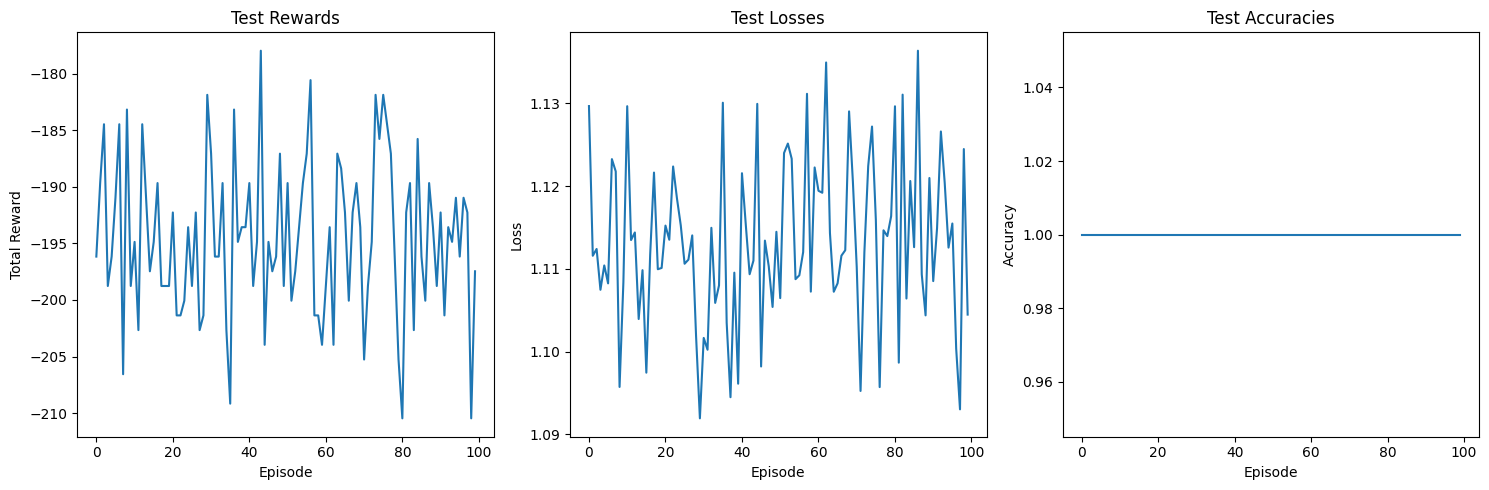

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv
import random
import matplotlib.pyplot as plt

# CongestionControlEnv definition
class CongestionControlEnv(gym.Env):
    def __init__(self, data, thresholds):
        super(CongestionControlEnv, self).__init__()
        self.data = data
        self.thresholds = thresholds
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        self.action_space = spaces.Discrete(2)
        self.current_step = 0
        self.state = None
        self.current_cca = 'default'
        self.available_ccas = ['cca1', 'cca2', 'cca3']

    def reset(self):
        self.current_step = 0
        self.state = self.data.iloc[self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values
        self.current_cca = 'default'
        return self.state

    def step(self, action):
        if action == 1:
            best_cca = self.evaluate_best_cca()
            if best_cca != self.current_cca:
                self.current_cca = best_cca
                print(f"Switched to congestion control algorithm: {self.current_cca}")

        self.current_step += 1
        done = self.current_step >= len(self.data)
        if not done:
            self.state = self.data.iloc[self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values
        else:
            self.state = None

        reward = self._calculate_reward(action)
        info = {'actual_action': action, 'cca': self.current_cca}

        return self.state, reward, done, info

    def evaluate_best_cca(self):
        current_state = self.state
        historical_data = self.get_historical_data()

        if historical_data is not None and len(historical_data) > 0:
            combined_state = 0.8 * current_state + 0.2 * np.mean(historical_data, axis=0)
        else:
            combined_state = current_state

        best_cca = self.choose_best_cca_from_evaluation(combined_state)
        return best_cca

    def choose_best_cca_from_evaluation(self, combined_state):
        weights = {'Throughput': 0.7, 'Latency': 0.2, 'LossRate': 0.1}
        cca_scores = {cca: sum(weights[metric] * combined_state[i] for i, metric in enumerate(weights)) for cca in self.available_ccas}
        best_cca = max(cca_scores, key=cca_scores.get)
        return best_cca

    def _calculate_reward(self, action):
        if self.state is None:
            return 0
        disparities = np.abs(self.state - self.data.iloc[self.current_step-1][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values)
        reward = 0
        if np.any(disparities > self.thresholds):
            reward += np.log10(0.059)
        else:
            reward -= np.log10(0.01)
        if action == 1:
            reward += np.log10(0.05)
        return reward

    def get_historical_data(self):
        return self.data.iloc[:self.current_step][['Throughput', 'Latency', 'LossRate', 'SendingRate']].values

# DQNAgent definition
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape
        self.action_space = action_space
        self.model = self.build_model()
        self.replay_buffer = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.loss_history = []
        self.accuracy_history = []

    def build_model(self):
        model = tf.keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=self.state_shape),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_space, activation='linear')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        state_tensor = tf.convert_to_tensor(state, dtype=tf.float32)
        act_values = self.model.predict(state_tensor)
        return np.argmax(act_values[0])

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

    def train(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        minibatch = random.sample(self.replay_buffer, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state_tensor = tf.convert_to_tensor(next_state, dtype=tf.float32)
                target = reward + self.gamma * np.amax(self.model.predict(next_state_tensor)[0])
            state_tensor = tf.convert_to_tensor(state, dtype=tf.float32)
            target_f = self.model.predict(state_tensor)
            target_f[0][action] = target
            history = self.model.fit(state_tensor, target_f, epochs=1, verbose=0)
            self.loss_history.append(history.history['loss'][0])
            self.accuracy_history.append(history.history['accuracy'][0])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save_model(self):
        self.model.save(self.save_path)

    def load_model(self, file_path):
        self.model = tf.keras.models.load_model(file_path)

# Load the trained model
model_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/my_dqn_model.h5'  # Update this path to your actual trained model path
trained_model = load_model(model_path)

# Load the test data from CSV file
test_data_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/test_data.csv'  # Update this path to your actual test data CSV file
test_data = pd.read_csv(test_data_path)

# Ensure the test data contains required columns
expected_columns = {'Throughput', 'LossRate', 'Latency', 'SendingRate'}
if not expected_columns.issubset(test_data.columns):
    raise ValueError(f"Test data must contain columns: {expected_columns}")

# Create the test environment
env = CongestionControlEnv(data=test_data[['Throughput', 'LossRate', 'Latency', 'SendingRate']], thresholds=[0.1, 0.1, 0.1, 0.1])

state_shape = (env.observation_space.shape[0],)
action_space = env.action_space.n

# Initialize the agent with the loaded model
agent = DQNAgent(state_shape, action_space)
agent.model = trained_model

# Evaluation parameters
TEST_EPISODES = 100
BATCH_SIZE = 32

# Initialize CSV file for logging test metrics
with open('test_log.csv', 'w', newline='') as csvfile:
    fieldnames = ['episode', 'total_reward', 'loss', 'accuracy']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

def calculate_accuracy(predicted_actions, actual_actions):
    return np.mean(np.array(predicted_actions) == np.array(actual_actions))

test_rewards = []
test_losses = []
test_accuracies = []

for episode in range(TEST_EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_shape[0]])
    total_reward = 0
    done = False
    episode_losses = []
    predicted_actions = []
    actual_actions = []

    while not done:
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        if next_state is not None:
            next_state = np.reshape(next_state, [1, state_shape[0]])
            state = next_state
        total_reward += reward

        # Predict and calculate loss only if next_state is not None
        if next_state is not None:
            predicted_q_values = agent.model.predict(state)
            actual_q_values = reward + (1 - done) * agent.gamma * np.amax(agent.model.predict(next_state)[0])
            loss = np.square(predicted_q_values[0][action] - actual_q_values)
            episode_losses.append(loss)

            # Collect actions for accuracy calculation
            predicted_actions.append(action)
            actual_actions.append(info.get('actual_action', -1))  # Use get() to handle missing keys

    avg_loss = np.mean(episode_losses) if episode_losses else 0  # Handle cases with no losses
    accuracy = calculate_accuracy(predicted_actions, actual_actions) if actual_actions else 0

    test_rewards.append(total_reward)
    test_losses.append(avg_loss)
    test_accuracies.append(accuracy)

    with open('test_log.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow({'episode': episode + 1, 'total_reward': total_reward, 'loss': avg_loss, 'accuracy': accuracy})

# Plot the test metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(test_rewards)
plt.title('Test Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 3, 2)
plt.plot(test_losses)
plt.title('Test Losses')
plt.xlabel('Episode')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(test_accuracies)
plt.title('Test Accuracies')
plt.xlabel('Episode')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.savefig('test_metrics.png')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from keras.models import load_model

# Load the trained model
model_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/my_dqn_model.h5'
trained_model = load_model(model_path)

# Load the test data from CSV file
test_data_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/test_data.csv'  # Update this with the actual path to your test CSV file
test_data = pd.read_csv(test_data_path)

# Check the columns
expected_columns = {'Throughput', 'LossRate', 'Latency', 'SendingRate'}
if not expected_columns.issubset(test_data.columns):
    raise ValueError(f"Test data must contain columns: {expected_columns}")

# Create the test environment with the test dataset
env = CongestionControlEnv(data=test_data[['Throughput', 'LossRate', 'Latency', 'SendingRate']], thresholds=[0.1, 0.1, 0.1, 0.1])

state_shape = (env.observation_space.shape[0],)
action_space = env.action_space.n

# Initialize agent with the loaded model
agent = DQNAgent(state_shape, action_space)
agent.model = trained_model

# Evaluation parameters
TEST_EPISODES = 100

# Initialize CSV file for logging test metrics
with open('test_log.csv', 'w', newline='') as csvfile:
    fieldnames = ['episode', 'total_reward']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()


In [ ]:
test_rewards = []

for episode in range(TEST_EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_shape[0]])
    total_reward = 0
    done = False
    while not done:
        # Remove the 'training' argument as it's not expected by the act method
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        if next_state is not None:
            next_state = np.reshape(next_state, [1, state_shape[0]])
            state = next_state
        total_reward += reward
    test_rewards.append(total_reward)

    with open('test_log.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow({'episode': episode + 1, 'total_reward': total_reward})

    print(f"Test Episode: {episode + 1}, Total Reward: {total_reward}")

# Save the test metrics
test_metrics_df = pd.DataFrame(test_rewards, columns=['Total Reward'])
test_metrics_df.to_csv('test_metrics.csv', index=False)

Switched to congestion control algorithm: cca1
Test Episode: 1, Total Reward: -177.94522246763654
Switched to congestion control algorithm: cca1
Test Episode: 2, Total Reward: -193.55758241560432
Switched to congestion control algorithm: cca1
Test Episode: 3, Total Reward: -194.8586124112683
Switched to congestion control algorithm: cca1
Test Episode: 4, Total Reward: -193.55758241560432
Switched to congestion control algorithm: cca1
Test Episode: 5, Total Reward: -188.3534624329484
Switched to congestion control algorithm: cca1
Test Episode: 6, Total Reward: -196.15964240693225
Switched to congestion control algorithm: cca1
Test Episode: 7, Total Reward: -196.15964240693228
Switched to congestion control algorithm: cca1
Test Episode: 8, Total Reward: -190.95552242427638
Switched to congestion control algorithm: cca1
Test Episode: 9, Total Reward: -197.46067240259626
Switched to congestion control algorithm: cca1
Test Episode: 10, Total Reward: -189.65449242861237
Switched to congestio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


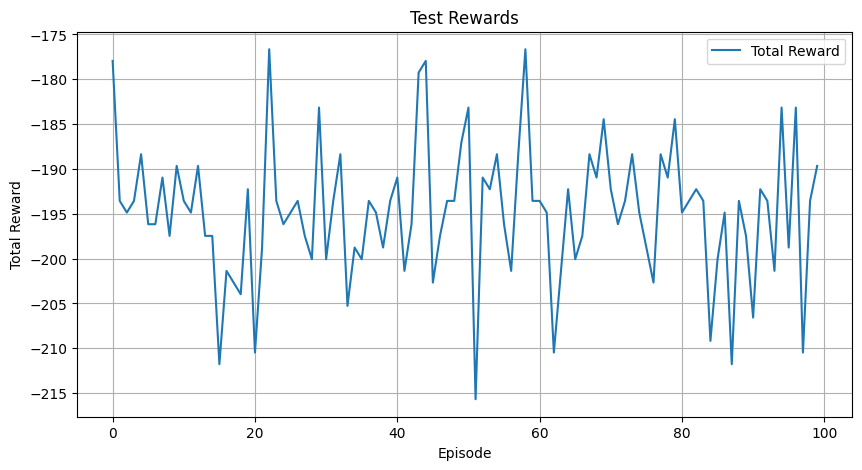

In [ ]:
# Plotting setup
plt.figure(figsize=(10, 5))
plt.plot(test_rewards, label='Total Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Test Rewards')
plt.legend()
plt.grid(True)
plt.savefig('test_metrics.png')
plt.show()


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from keras.models import load_model

# Load the trained model
model_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/my_dqn_model.h5'
trained_model = load_model(model_path)

# Load the test data from CSV file
test_data_path = '/content/drive/MyDrive/combine results/revised data/DRL Data/test_data.csv'  # Update this with the actual path to your test CSV file
test_data = pd.read_csv(test_data_path)

# Check the columns
expected_columns = {'Throughput', 'LossRate', 'Latency', 'SendingRate'}
if not expected_columns.issubset(test_data.columns):
    raise ValueError(f"Test data must contain columns: {expected_columns}")

# Create the test environment with the test dataset
env = CongestionControlEnv(data=test_data[['Throughput', 'LossRate', 'Latency', 'SendingRate']], thresholds=[0.1, 0.1, 0.1, 0.1])

state_shape = (env.observation_space.shape[0],)
action_space = env.action_space.n

# Initialize agent with the loaded model
agent = DQNAgent(state_shape, action_space)
agent.model = trained_model

# Evaluation parameters
TEST_EPISODES = 100

# Initialize CSV file for logging test metrics
with open('test_log.csv', 'w', newline='') as csvfile:
    fieldnames = ['episode', 'total_reward', 'loss', 'accuracy']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()


In [ ]:
def calculate_accuracy(predicted_actions, actual_actions):
    return np.mean(np.array(predicted_actions) == np.array(actual_actions))

test_rewards = []
test_losses = []
test_accuracies = []

for episode in range(TEST_EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_shape[0]])
    total_reward = 0
    done = False
    episode_losses = []
    predicted_actions = []
    actual_actions = [] # Initialize actual_actions here

    while not done:
        # Remove the 'training' argument
        action = agent.act(state)
        next_state, reward, done, info = env.step(action) # Capture the info returned by env.step
        if next_state is not None:
            next_state = np.reshape(next_state, [1, state_shape[0]])
            state = next_state
        total_reward += reward

        # Predict and calculate loss only if next_state is not None
        if next_state is not None: # Check if next_state is valid before prediction
            predicted_q_values = agent.model.predict(state)
            actual_q_values = reward + (1 - done) * agent.gamma * np.amax(agent.model.predict(next_state)[0])
            loss = np.square(predicted_q_values[0][action] - actual_q_values)
            episode_losses.append(loss)

            # Collect actions for accuracy calculation
            predicted_actions.append(action)
            # Check if 'actual_action' is in the info dictionary and append it to actual_actions
            if 'actual_action' in info:
                actual_actions.append(info['actual_action'])

    avg_loss = np.mean(episode_losses) if episode_losses else 0 # Handle cases with no losses
    # Calculate accuracy only if actual_actions is not empty
    if actual_actions:
        accuracy = calculate_accuracy(predicted_actions, actual_actions)
    else:
        accuracy = 0  # Or handle the case where no actual actions are available

    test_rewards.append(total_reward)
    test_losses.append(avg_loss)
    test_accuracies.append(accuracy)

    with open('test_log.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow({'episode': episode + 1, 'total_reward': total_reward, 'loss': avg_loss, 'accuracy': accuracy})

    print(f"Test Episode: {episode + 1}, Total Reward: {total_reward}, Loss: {avg_loss}, Accuracy: {accuracy}")

# Save the test metrics
test_metrics_df = pd.DataFrame({
    'Total Reward': test_rewards,
    'Loss': test_losses,
    'Accuracy': test_accuracies
})
test_metrics_df.to_csv('test_metrics.csv', index=False)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 62ms/step
Test Episode: 81, Total Reward: -207.8689123679081, Loss: 1.1317535982944225, Accuracy: 0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 32ms/step
Test Episode: 82, Total Reward: -187.05243243728438, Loss: 1.102351640831606, Accuracy: 0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 48ms/step
Test Episode: 83, Total Reward: -200.0627323939242, Loss: 1.112855190315607, Accuracy: 0
1/1 [==============================] - 0s 41ms/step
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 38ms/step
Test Episode: 84, Total Reward: -190.95552242427635, Loss: 1.1055750610840704, Accuracy: 0
Switched to congestion control algorithm: cca1
1/1 [==============================] - 0s 46ms/step
Test Episode: 85, Total Reward: -188.3534624329484, Loss: 1.101153441071133, Accuracy: 0


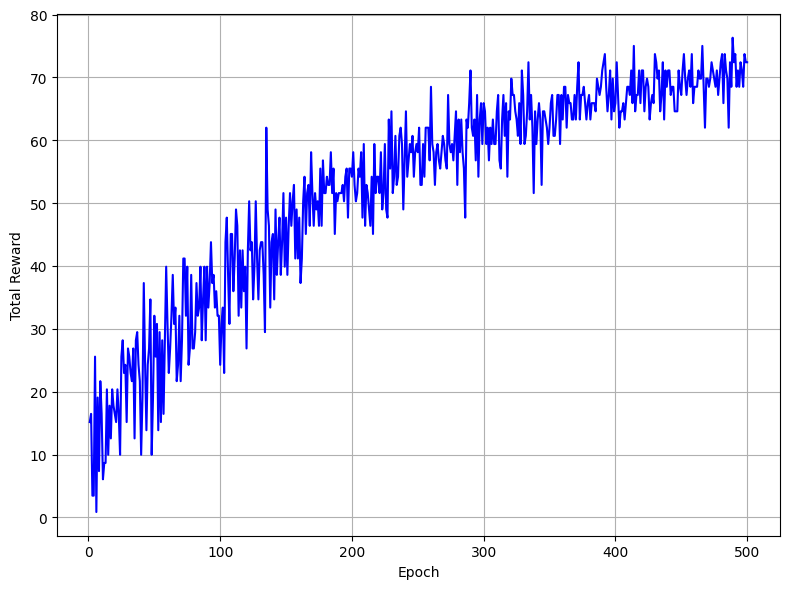

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Plotting total_reward + 198 in a separate graph
plt.figure(figsize=(8, 6))
plt.plot(df.index + 1, df['total_reward'] + 198, linestyle='-', color='b')
#plt.title('Total Reward + 198')
plt.xlabel('Epoch')
plt.ylabel('Total Reward')
plt.grid(True)
plt.tight_layout()
plt.show()


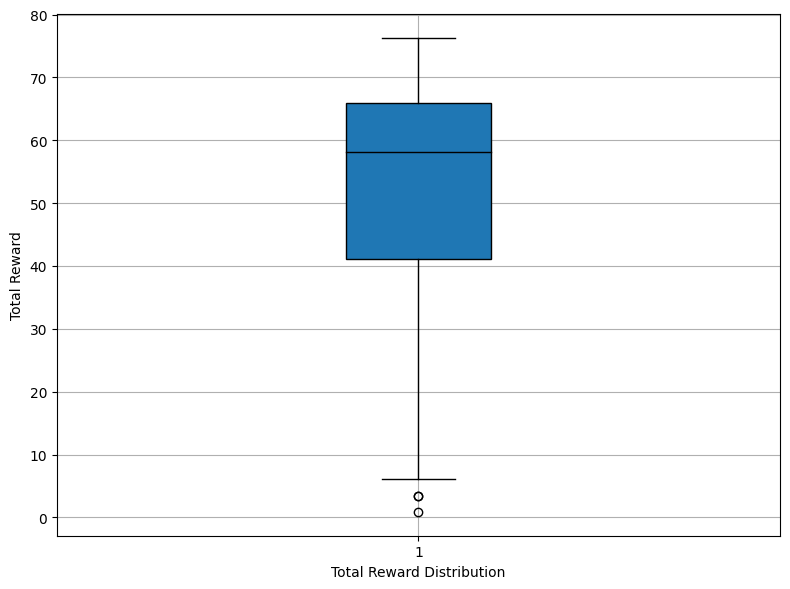

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Adjusted total_reward
adjusted_total_reward = df['total_reward'] + 198

# Vertical box plot for adjusted_total_reward
plt.figure(figsize=(8, 6))
plt.boxplot(adjusted_total_reward, vert=True, patch_artist=True, widths=0.2, medianprops=dict(color='black'))
#plt.title(' Total Reward Distribution')
plt.ylabel('Total Reward')
plt.xlabel('Total Reward Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


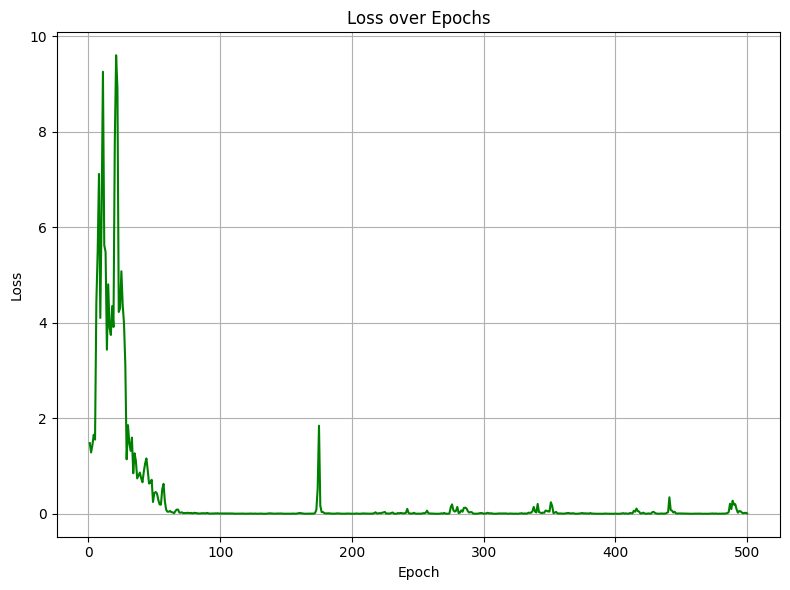

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Plotting loss
plt.figure(figsize=(8, 6))
plt.plot(df.index + 1, df['loss'], linestyle='-', color='g')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


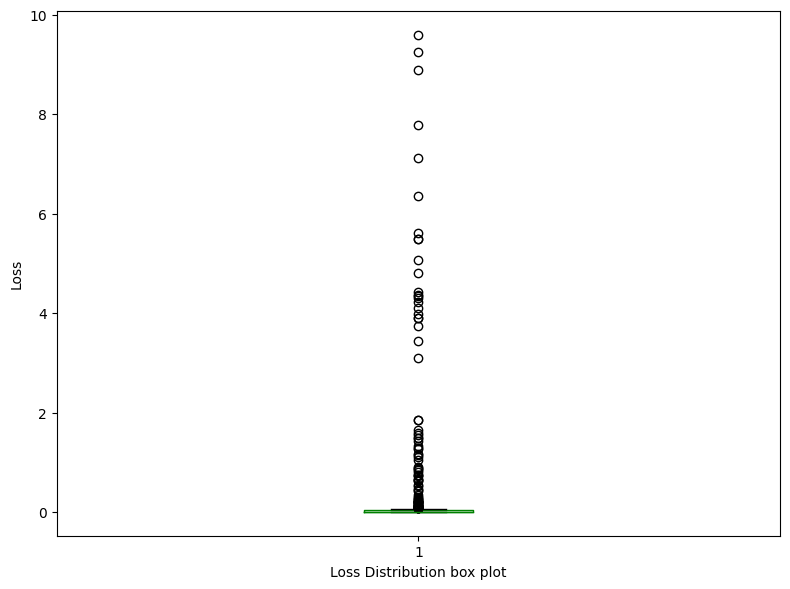

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Box plot for loss
plt.figure(figsize=(8, 6))
boxprops = dict(color='g')
medianprops = dict(color='g')
plt.boxplot(df['loss'], boxprops=boxprops, medianprops=medianprops)
plt.ylabel('Loss')
plt.xlabel('Loss Distribution box plot')
#plt.grid(True)
plt.tight_layout()
plt.show()


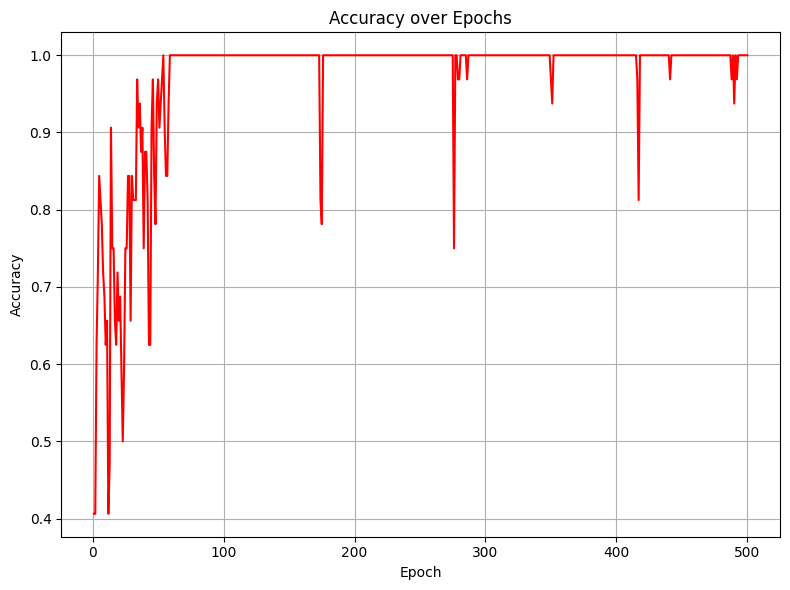

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(df.index + 1, df['accuracy'], linestyle='-', color='r')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


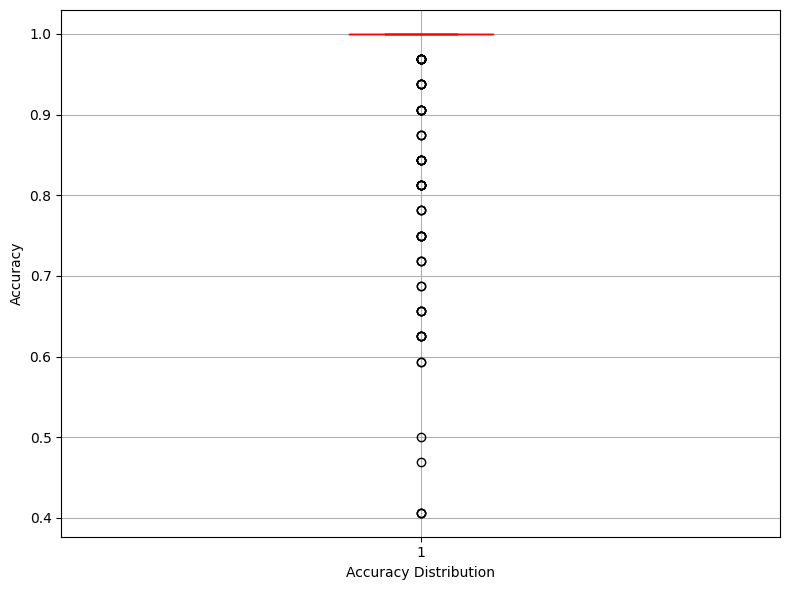

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from your CSV file
csv_file = '/content/drive/MyDrive/combine results/revised data/DRL Data/training_log_2.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Box plot for accuracy
plt.figure(figsize=(8, 6))
plt.boxplot(df['accuracy'], vert=True, patch_artist=True, widths=0.2, medianprops=dict(color='red'))
plt.xlabel('Accuracy Distribution')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()
